In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Attribute Information:

# Input variables:
### bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
### related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
### other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
### social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

#### Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [2]:
df = pd.read_csv('bank-full.csv',';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### __Melihat apakah terdapat kolom yang terisi NaN__

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


__Hasil output di atas menunjukkan bahwa tidak terdapat NaN value untuk setiap kolom__

In [4]:
## Function untuk melihat value counts dan unique

def ValCountUniqueCheck(dataframe):
    for col in dataframe.columns:
        print(f'{col.upper()} \n{dataframe[col].value_counts(dropna=False)}\n\n{dataframe[col].unique()}', end='\n\n\n')

### __Melihat kolom yang terisi dengan value yang bisa dianggap 'NaN'__

In [5]:
ValCountUniqueCheck(df)

AGE 
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
88       2
92       2
93       2
95       2
94       1
Name: age, Length: 77, dtype: int64

[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]


JOB 
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']


MARITAL 
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

['married' 'single' 'divorced']


EDUCATION 
secondary    232

__Dari hasil output di atas dapat diketahui bahwa kolom 'job, education, contact, poutcome' terdapat value 'unknown'. Untuk kolom yang lain tidak terdapat value yang dapat dianggap missing value.__

### __Mengganti value 'unknown' dengan NaN untuk memudahkan pada proses Impute__

In [6]:
df.job = np.where(df['job'] == 'unknown', np.nan, df.job)
df.education = np.where(df['education'] == 'unknown', np.nan, df.education)
df.contact = np.where(df['contact'] == 'unknown', np.nan, df.contact)
df.poutcome = np.where(df['poutcome'] == 'unknown', np.nan, df.poutcome)

### __Visualisasi NaN value__

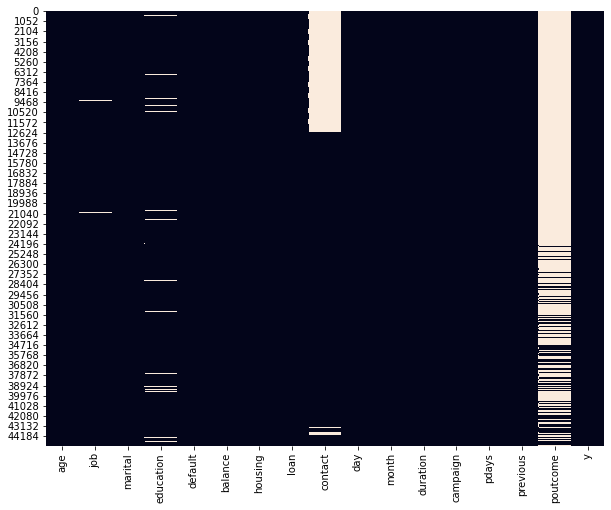

In [7]:
plt.figure(figsize = (10, 8))
sns.heatmap(df.isnull(), cbar = False)
plt.show()

__Dapat dilihat bahwa pada kolom contact dan poutcome banyak terisi nilai NaN. Jadi, langkah berikut adalah melihat berapa proporsi NaN value pada kolom contact dan poutcome.__

In [8]:
df.contact.value_counts(dropna=False, normalize=True)*100

cellular     64.774059
NaN          28.798301
telephone     6.427639
Name: contact, dtype: float64

In [9]:
df.poutcome.value_counts(dropna=False, normalize=True)*100

NaN        81.747805
failure    10.840282
other       4.069806
success     3.342107
Name: poutcome, dtype: float64

__Nilai NaN pada kolom contact memiliki proporsi sebesar 28,80%. Sedangkan, nilai NaN di kolom poutcome mencapai 81,75%.__

__Pada kolom contact, NaN value masih berada di angka yang wajar dan proporsinya masih lebih sedikit dari kategori cellular. Masalah missing value pada kolom contact dapat diatasi dengan teknik imputing.__

__Pada kolom poutcome, missing value sangat mendominasi kolom tersebut. Sehingga, kolom tersebut dapat dihilangkan dan tidak diproses pada langkah berikutnya.__

In [10]:
### jumlah row jika setiap row yang mengandung NaN pada kolom poutcome dihapus
len(df) - (df.poutcome.value_counts(dropna=False, normalize=True))[0]*len(df)

8252.0

### __Menambahkan kolom year pada dataframe__

#### __a. Mencari batas tahun 2008__

In [11]:
df_dec_2008 = df[df['month'] == 'dec']

In [12]:
df_dec_2008.index

Int64Index([27716, 27717, 27718, 27719, 27720, 27721, 27722, 27723, 27724,
            27725,
            ...
            42581, 42582, 42583, 42584, 42585, 42586, 42587, 42588, 42589,
            42590],
           dtype='int64', length=214)

In [13]:
df_27716 = df.iloc[df_dec_2008.index[0]:]
df_27716.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
27716,41,technician,married,secondary,no,0,yes,no,telephone,4,dec,43,1,-1,0,NaN,no
27717,38,management,divorced,tertiary,no,0,yes,yes,cellular,4,dec,18,1,-1,0,NaN,no
27718,50,technician,married,tertiary,no,72,no,no,telephone,5,dec,12,1,-1,0,NaN,no
27719,30,blue-collar,single,secondary,no,130,no,no,telephone,5,dec,291,1,-1,0,NaN,no
27720,22,management,single,tertiary,no,760,no,no,telephone,7,dec,6,1,-1,0,NaN,no


In [14]:
i = df_dec_2008.index[0]

for month in df_27716['month']:
    if month != 'dec':
        print(i, month)
        break
    i += 1

27729 jan


__Output di atas menunjukkan bahwa tahun 2008 diakhiri pada index ke 27729 - 1 = 27728.__

__Tahun 2009 dimulai pada index 27729.__

#### __b. Mencari Batas Tahun 2009__

In [15]:
df_dec_2009 = df.iloc[i:][df.iloc[i:]['month'] == 'dec']
df_dec_2009.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
42390,28,admin.,married,secondary,no,330,no,no,cellular,2,dec,357,1,188,3,other,yes
42391,31,technician,married,secondary,no,318,no,no,cellular,2,dec,310,1,-1,0,NaN,yes
42392,26,blue-collar,single,tertiary,no,644,no,no,cellular,2,dec,346,1,-1,0,NaN,yes
42393,60,retired,divorced,tertiary,no,4,yes,no,cellular,2,dec,415,1,190,5,failure,yes
42394,44,NaN,single,NaN,no,18881,no,no,cellular,2,dec,187,2,-1,0,NaN,no


In [16]:
df_dec_2009.index

Int64Index([42390, 42391, 42392, 42393, 42394, 42395, 42396, 42397, 42398,
            42399,
            ...
            42581, 42582, 42583, 42584, 42585, 42586, 42587, 42588, 42589,
            42590],
           dtype='int64', length=201)

In [17]:
df_42390 = df.iloc[df_dec_2009.index[0]:]
df_42390.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
42390,28,admin.,married,secondary,no,330,no,no,cellular,2,dec,357,1,188,3,other,yes
42391,31,technician,married,secondary,no,318,no,no,cellular,2,dec,310,1,-1,0,NaN,yes
42392,26,blue-collar,single,tertiary,no,644,no,no,cellular,2,dec,346,1,-1,0,NaN,yes
42393,60,retired,divorced,tertiary,no,4,yes,no,cellular,2,dec,415,1,190,5,failure,yes
42394,44,NaN,single,NaN,no,18881,no,no,cellular,2,dec,187,2,-1,0,NaN,no


In [18]:
j = df_dec_2009.index[0]

for month_2009 in df_42390['month']:
    if month_2009 != 'dec':
        print(j, month_2009)
        break
    j += 1

42591 jan


__Output di atas menunjukkan bahwa tahun 2009 diakhiri pada index ke 42591 - 1 = 42590.__

__Tahun 2010 dimulai pada index 42591.__

#### __c. Mengetahui Batas Tahun 2010__

In [19]:
df_2010 = df.iloc[j:]
df_2010.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


#### __d. Membuat Kolom year Berdasarkan Batas Tahun yang Telah Dibuat__

In [20]:
df['year'] = 'NaN'
df.loc[:i-1,'year'] = 2008
df.loc[i:j-1,'year'] = 2009
df.loc[j:,'year'] = 2010

In [21]:
df[df['year'] == 2008].tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,year
27724,55,retired,divorced,secondary,no,366,no,no,telephone,11,dec,173,1,-1,0,NaN,no,2008
27725,38,management,married,tertiary,no,0,yes,no,telephone,12,dec,136,1,-1,0,NaN,no,2008
27726,32,blue-collar,single,secondary,no,232,no,no,NaN,13,dec,232,1,-1,0,NaN,no,2008
27727,53,management,divorced,secondary,no,1004,no,yes,telephone,22,dec,119,1,-1,0,NaN,yes,2008
27728,28,admin.,single,secondary,no,6100,no,no,NaN,27,dec,333,1,-1,0,NaN,no,2008


In [22]:
df[df['year'] == 2009].tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,year
42586,30,management,single,tertiary,no,2907,yes,no,cellular,30,dec,146,2,218,1,failure,no,2009
42587,46,management,divorced,tertiary,no,461,no,no,cellular,30,dec,369,2,-1,0,NaN,yes,2009
42588,30,housemaid,single,tertiary,no,3185,yes,no,cellular,30,dec,158,3,-1,0,NaN,no,2009
42589,40,admin.,married,secondary,no,3126,yes,no,cellular,30,dec,110,3,232,2,failure,no,2009
42590,32,technician,married,NaN,no,14533,no,no,cellular,31,dec,646,3,198,2,success,no,2009


In [23]:
df[df['year'] == 2010].tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,year
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes,2010
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes,2010
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,2010
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no,2010
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no,2010


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        44923 non-null  object
 2   marital    45211 non-null  object
 3   education  43354 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    32191 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   8252 non-null   object
 16  y          45211 non-null  object
 17  year       45211 non-null  object
dtypes: int64(7), object(11)
memory usage: 6.2+ MB


### __Mengganti Dtype Kolom__

#### __a. Kolom year menjadi datetime__

In [25]:
# df['year'] = pd.to_datetime(df['year'])

In [26]:
# df.head()